In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

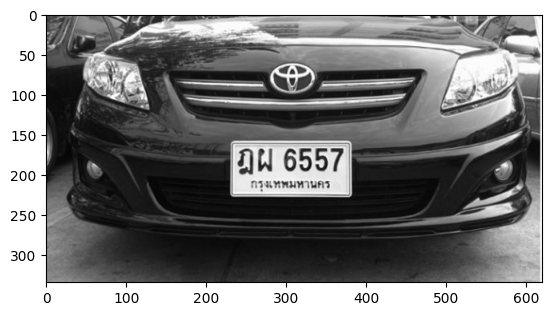

In [2]:
#read img
img = cv2.imread('plate/plate2.jpg')
#gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #blue green red to gray
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) #for vsl, plt expect rgb so i cvt it to rgb

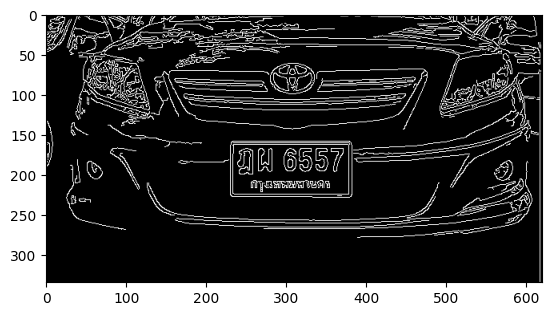

In [3]:
bf = cv2.bilateralFilter(gray, 11, 17, 17) #noise reduc
edged = cv2.Canny(bf, 30, 200) #edge detect
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [4]:
keyp = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keyp)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [5]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [6]:
location

array([[[231, 159]],

       [[232, 227]],

       [[382, 225]],

       [[379, 158]]], dtype=int32)

In [7]:
mask = np.zeros(gray.shape, np.uint8)
new_img = cv2.drawContours(mask, [location], 0, 255, -1)
new_img = cv2.bitwise_and(img, img, mask=mask)

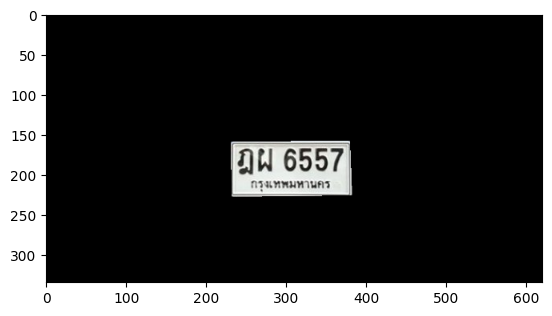

In [8]:
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

In [9]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_img = gray[x1:x2+1, y1:y2+1]

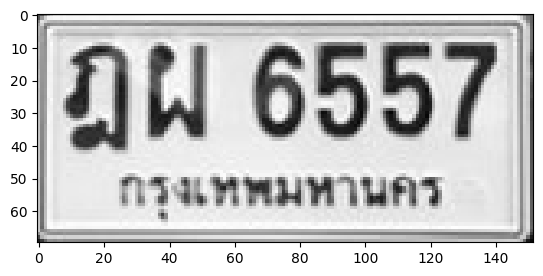

In [10]:
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

In [11]:
reader = easyocr.Reader(['th'])
res = reader.readtext(cropped_img)
res

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[5, 3], [147, 3], [147, 45], [5, 45]], 'ฎผ 6557', 0.4443806756309346),
 ([[23, 47], [127, 47], [127, 65], [23, 65]],
  'กรุงทฯมหานคร',
  0.2201127791486324)]

In [12]:
print(f'License : {res[0][1]}\nProvince : {res[1][1]}')

License : ฎผ 6557
Province : กรุงทฯมหานคร
